In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

# Covariance matrix

In [2]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url, sep=',', header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [3]:
#extract only the numeric data

numberDataset = data._get_numeric_data()

dataMat = numberDataset.drop(['state', 'fold'], axis=1).values #불필요한 컬럼 삭제
dataMat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]], shape=(1994, 100))

2.4498401746994428e-18


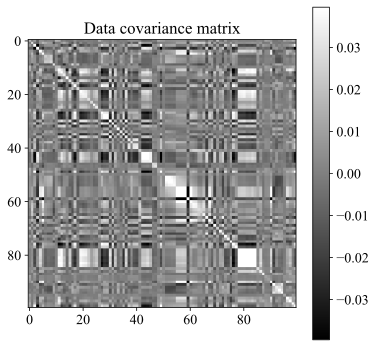

In [4]:
# compute the mean of each data feature

datamean = np.mean(dataMat, axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# confirm that any given feature has mean=0 (or very close)
print(np.mean(dataMatM[:,0]))

# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM #data matrix 와 transpose 한 것을 내적
covMat /= (dataMatM.shape[0]-1) # N-1 로 나누어 정규화

clim = np.max(np.abs(covMat)) * .2

plt.figure(figsize=(6,6))
plt.imshow(covMat, vmin=-clim, vmax=clim, cmap='gray')
plt.colorbar()
plt.title('Data covariance matrix')
plt.savefig('Figure_06_01.png', dpi=600)
plt.show()

# Transformation matrices

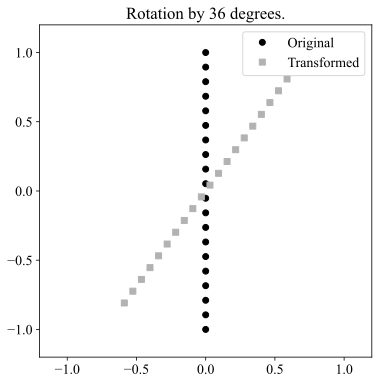

In [6]:
# angle to rotate by

th = np.pi/5 #회전 각도(라디안 단위) -> 180/5=36도

# 시계 방향 회전을 위한 행렬
## 회전 변환 행렬 활용 - https://ko.wikipedia.org/wiki/%ED%9A%8C%EC%A0%84%EB%B3%80%ED%99%98%ED%96%89%EB%A0%AC
## 삼각함수의 덧셈 정리 활용 - https://www.youtube.com/watch?v=6HkoM39M7e8
T = np.array([
             [np.cos(th), np.sin(th)], 
             [-np.sin(th), np.cos(th)]
            ])

x = np.linspace(-1, 1, 20) #-1~1까지 20개의 균일한 점 생성
origPoints = np.vstack((np.zeros(x.shape), x))

# apply the transformation
transformedPoints = T @ origPoints

plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:], origPoints[1,:], 'ko', label='Original')
plt.plot(transformedPoints[0, :], transformedPoints[1,:], 's', color=[.7, .7, .7], label='Transformed')

plt.axis('square')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.legend()
plt.title(f'Rotation by {np.rad2deg(th):.0f} degrees.')
plt.savefig('Figure_06_02.png', dpi=600)
plt.show()

# Animating transformations

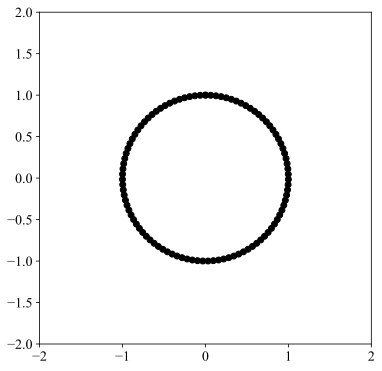

In [7]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


def aframe(ph):

    T = np.array([
            [1,1-ph],
            [0,1]
             ])

    P = T@points

    plth.set_xdata(P[0, :])
    plth.set_ydata(P[1, :])

    return plth

theta = np.linspace(0, 2*np.pi, 100)
points = np.vstack((np.sin(theta), np.cos(theta)))

fig, ax = plt.subplots(1, figsize=(12, 6))
plth, = ax.plot(np.cos(x), np.sin(x), 'ko')
ax.set_aspect('equal')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_ylim([-2, 2])

phi = np.linspace(-1, 1-1/40, 40)**2

animation.FuncAnimation(fig, aframe, phi, interval=100, repeat=True)

# Image convolution

In [8]:
imgN = 20
image = np.random.randn(imgN, imgN)

kernelN = 7
Y, X = np.meshgrid(np.linspace(-3, 3, kernelN), np.linspace(-3, 3, kernelN)) # 2D grid
kernel = np.exp(-(X**2+Y**2)/7) #가우시안 함수(자연 상수(e)가 밑이고 ()내 값으로 제곱하는 지수 함수) -> 부드럽게 블러 처리하는 용도
kernel = kernel / np.sum(kernel) #normalize(커널의 합이 1이 되도록 만들어서, 필터 적용 시 이미지 밝기 총량 보존)

In [12]:
# convolution
"""
- 전체 구조 요약
    이미지를 패딩해서 가장자리도 필터링 가능하게 만들고
    각 위치에서 커널과 겹치는 이미지 조각을 뽑아
    커널과 곱한 뒤 합산해서 출력 이미지에 저장

"""

halfKr = kernelN//2 # 커널을 이미지 중심에 놓기 위해 필요한 커널의 절반 크기
convoutput = np.zeros((imgN+kernelN-1, imgN+kernelN-1)) # 패딩 포함된 출력 이미지 크기(원래 이미지보다 커짐)

imagePad = np.zeros(convoutput.shape) # 0으로 패딩하여 가장자리도 필터링 가능하게 함
imagePad[halfKr:-halfKr:1, halfKr:-halfKr:1] = image

for rowi in range(halfKr, imgN+halfKr): # imagePad 내에서 실제 이미지가 있는 영역만 순회
    for coli in range(halfKr, imgN+halfKr):

        #cut out a piece of the image
        pieceOfImg = imagePad[rowi-halfKr:rowi+halfKr+1:1, coli-halfKr:coli+halfKr+1:1] # 커널이 덮고 있는 이미지 영역을 잘라냄(커널과 같은 크기의 작은 조각)

        # dot product : element-wise multiply and sum
        dotprod = np.sum(pieceOfImg*kernel) # 커널과 이미지 조각을 곱해서 더함(합성곱)

        # store the result for this pixel
        convoutput[rowi, coli] = dotprod # 결과를 해당 위치에 저장

convoutput = convoutput[halfKr:-halfKr:1, halfKr:-halfKr:1] # 패딩 영역 잘라내기 -> 최종적으로 입력 이미지와 같은 크기로 원복

In [13]:
from scipy.signal import convolve2d

convoutput2 = convolve2d(image, kernel, mode='same')

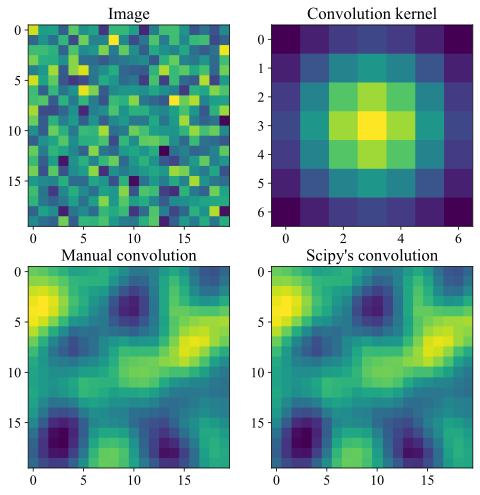

In [14]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")

plt.savefig('Figure_06_04b.png', dpi=600)
plt.show()

(1675, 3000, 3)


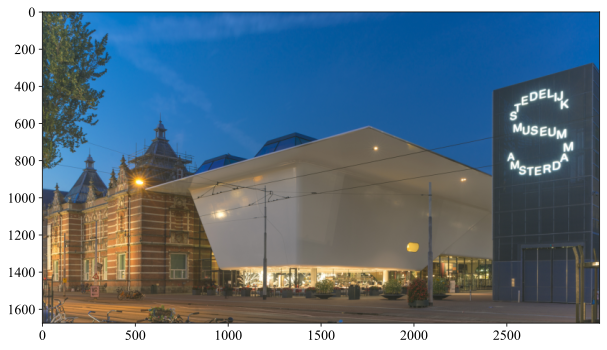

(1675, 3000)


In [20]:
from skimage import io, color #pip install scikit-image

bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

print(bathtub.shape)

fig = plt.figure(figsize=(10, 6))
plt.imshow(bathtub)
plt.savefig('Figure_06_05a.png', dpi=600)
plt.show()

bathtub2d = color.rgb2gray(bathtub)

print(bathtub2d.shape)

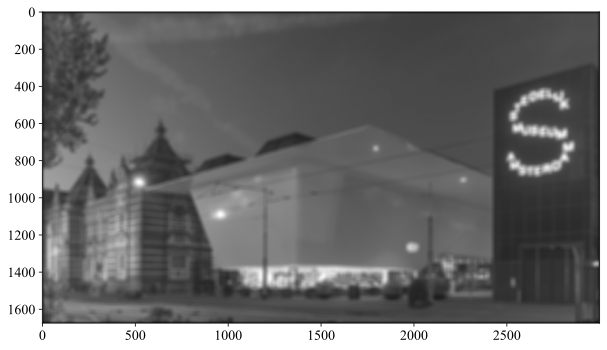

In [23]:
kernelN = 29
Y, X = np.meshgrid(np.linspace(-3,3,kernelN), np.linspace(-3,3,kernelN))
kernel = np.exp(-(X**2+Y**2)/20)
kernel = kernel/np.sum(kernel) #normalize

smooth_bathtub = convolve2d(bathtub2d, kernel, mode='same')

fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub, cmap='gray')
plt.savefig('Figure_06_05b.png', dpi=600)
plt.show()